In [ ]:
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [ ]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.1 MB/s eta 0:00:00


In [ ]:
!pip install lz4
!pip install --upgrade lz4 joblib
import lz4
import joblib
print(f"lz4 version: {lz4.__version__}")
print(f"joblib version: {joblib.__version__}")
!pip uninstall lz4 joblib -y
!pip install lz4 joblib
!pip install --force-reinstall lz4

lz4 version: 4.3.3
joblib version: 1.4.2
Found existing installation: lz4 4.3.3
Uninstalling lz4-4.3.3:
  Successfully uninstalled lz4-4.3.3
Found existing installation: joblib 1.4.2
Uninstalling joblib-1.4.2:
  Successfully uninstalled joblib-1.4.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.
  Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Attempting uninstall: lz4
    Found existing installation: lz4 4.3.3
    Uninstalling lz4-4.3.3:
      Successful

In [ ]:
# Check if packages are already installed
try:
    import lz4
    import joblib
    import mtcnn
except ImportError:
    # Install packages if not found
    !pip install mtcnn
    !pip install lz4

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.patches as patches
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [ ]:
main_directory = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'
# Initialize counts
folder_count = 0
total_file_count = 0

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    # Count folders
    folder_count += len(dirs)

    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count

    # Print the folder name and the number of files in that folder
    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")

# Print the overall results
print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}")


Folder: 105_classes_pins_dataset, Files: 0
Folder: pins_Alex Lawther, Files: 152
Folder: pins_Logan Lerman, Files: 212
Folder: pins_Maria Pedraza, Files: 122
Folder: pins_Anthony Mackie, Files: 124
Folder: pins_Bobby Morley, Files: 138
Folder: pins_Chris Evans, Files: 166
Folder: pins_Chris Pratt, Files: 176
Folder: pins_Mark Zuckerberg, Files: 95
Folder: pins_Anne Hathaway, Files: 203
Folder: pins_Emilia Clarke, Files: 210
Folder: pins_Cristiano Ronaldo, Files: 98
Folder: pins_Josh Radnor, Files: 117
Folder: pins_Henry Cavil, Files: 195
Folder: pins_Zoe Saldana, Files: 186
Folder: pins_ellen page, Files: 188
Folder: pins_Gwyneth Paltrow, Files: 187
Folder: pins_Natalie Dormer, Files: 198
Folder: pins_barbara palvin, Files: 197
Folder: pins_Krysten Ritter, Files: 171
Folder: pins_elon musk, Files: 135
Folder: pins_Leonardo DiCaprio, Files: 237
Folder: pins_Bill Gates, Files: 122
Folder: pins_elizabeth olsen, Files: 221
Folder: pins_Megan Fox, Files: 209
Folder: pins_Taylor Swift, Files

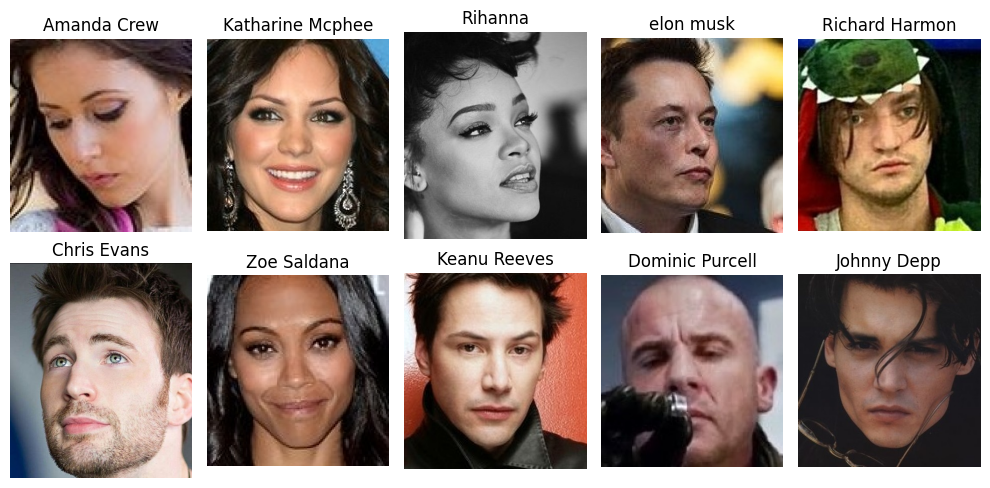

In [ ]:
# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick 10 folders
selected_folders = random.sample(all_folders, 10)

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through selected folders and display one random image from each folder
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(main_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Randomly pick one image
    selected_image = random.choice(all_images)

    # Get the full path to the selected image
    image_path = os.path.join(folder_path, selected_image)

    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')

    # Extract label from folder name and drop the first 5 characters
    label = folder[5:]
    axes[i // 5, i % 5].set_title(label)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

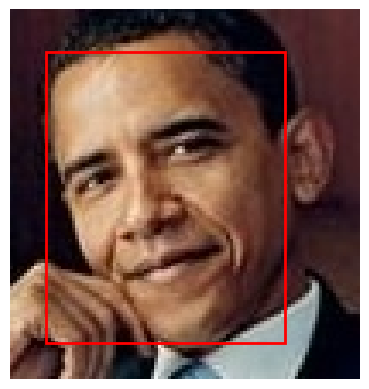

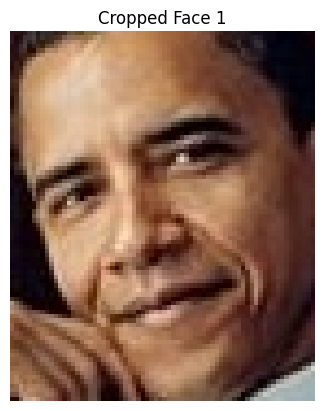

In [ ]:

# Function to perform face detection, display the image with bounding boxes, and crop faces
def detect_and_display_faces(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to RGB for compatibility with MTCNN
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load the pre-trained MTCNN model
    detector = MTCNN()

    # Perform face detection
    faces = detector.detect_faces(img_rgb)

    # Display the original image
    fig, ax = plt.subplots()
    ax.imshow(img_rgb)

    cropped_faces = []  # List to store cropped faces
    # Add bounding boxes for each detected face and crop them
    for face in faces:
        x, y, w, h = face['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Crop the face from the image
        cropped_face = img[y:y + h, x:x + w]
        cropped_faces.append(cropped_face)

    plt.axis('off')
    plt.show()

    # Display cropped faces
    for i, face in enumerate(cropped_faces):
        plt.figure()
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Cropped Face {i + 1}')
        plt.show()

# Specify the path to the main directory
main_directory = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick a folder
selected_folder = random.choice(all_folders)
folder_path = os.path.join(main_directory, selected_folder)

# Get a list of all images in the selected folder
all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Randomly pick an image from the folder
selected_image = random.choice(all_images)
image_path = os.path.join(folder_path, selected_image)

# Perform face detection using MTCNN and display the result
detect_and_display_faces(image_path)


In [ ]:

# Function to crop faces from an image and save them to the destination folder
def crop_and_save_faces(source_dir, destination_dir):
    # Initialize MTCNN detector
    detector = MTCNN()

    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Loop through each folder (celebrity) in the dataset
    for folder in os.listdir(source_dir):
        person_folder = os.path.join(source_dir, folder)
        dest_folder = os.path.join(destination_dir, folder)

        # Create a folder for each celebrity in the destination directory
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)

        # Loop through each image in the celebrity folder
        for img_file in os.listdir(person_folder):
            img_path = os.path.join(person_folder, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Convert BGR to RGB for MTCNN
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(img_rgb)

#             # Crop and save faces
#             for i, face in enumerate(faces):
#                 x, y, w, h = face['box']
#                 cropped_face = img[y:y+h, x:x+w]
            for i, face in enumerate(faces):
                x, y, w, h = face['box']
                # Crop the face from the image
                cropped_face = img[y:y + h, x:x + w]


                # Resize the cropped face to 100x100
                cropped_face_resized = cv2.resize(cropped_face, (100, 100))

                # Save the cropped image
                cropped_image_path = os.path.join(dest_folder, f"{img_file.split('.')[0]}_cropped_{i}.jpg")
                cv2.imwrite(cropped_image_path, cropped_face_resized)

# Path to the original dataset
source_directory ='/kaggle/input/pins-face-recognition/105_classes_pins_dataset'

# Path to the new cropped dataset (change to a writable directory)
destination_directory = '/kaggle/working/cropped'

# Crop faces and save them in the new dataset
crop_and_save_faces(source_directory, destination_directory)


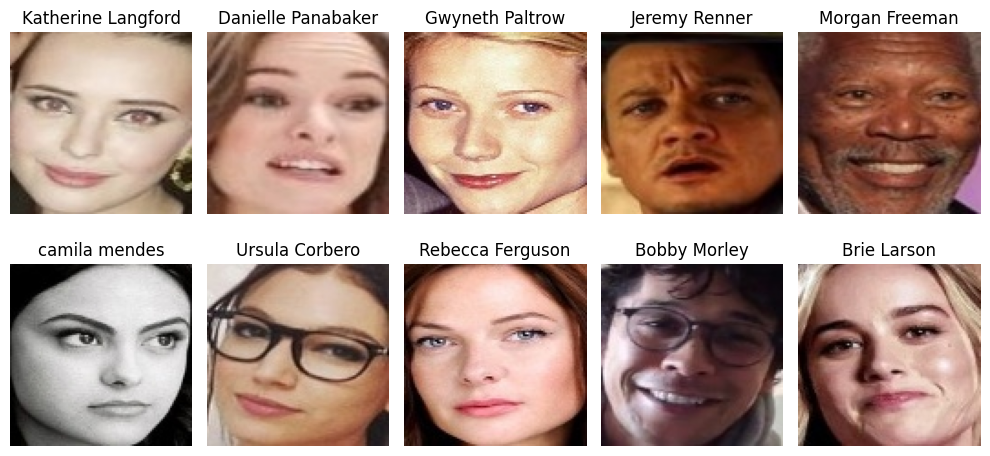

In [ ]:
# Get a list of all folders
dirr='/kaggle/working/cropped'
all_folders = [folder for folder in os.listdir(dirr) if os.path.isdir(os.path.join(dirr, folder))]

# Randomly pick 10 folders
selected_folders = random.sample(all_folders, 10)

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through selected folders and display one random image from each folder
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(dirr, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Randomly pick one image
    selected_image = random.choice(all_images)

    # Get the full path to the selected image
    image_path = os.path.join(folder_path, selected_image)

    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')

    # Extract label from folder name and drop the first 5 characters
    label = folder[5:]
    axes[i // 5, i % 5].set_title(label)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Set parameters
img_width, img_height = 100, 100
batch_size = 100
data_dir ='/kaggle/working/cropped'

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1/255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
    validation_split=0.2  # Set aside 20% for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 13982 images belonging to 105 classes.
Found 3449 images belonging to 105 classes.


In [ ]:

import random
original_images, labels = next(train_generator)

# Randomly select 3 images
random_indices = random.sample(range(original_images.shape[0]), 1)
selected_images = original_images[random_indices]

# Print the pixel values of original images
print("Original Image Values:")
for i, idx in enumerate(random_indices):
    print(f"Image {i+1}:")
    print(selected_images[i])
    print("\n")

# Augment and print the values of the augmented images
print("Augmented Image Values:")
for i, idx in enumerate(random_indices):
    augmented_images = datagen.flow(np.expand_dims(selected_images[i], axis=0), batch_size=1)
    augmented_image = next(augmented_images)[0]

    print(f"Augmented Image {i+1}:")
    print(augmented_image)
    print("\n")


Original Image Values:
Image 1:
[[[0.67443854 0.6783601  0.74894834]
  [0.65927744 0.663199   0.73378724]
  [0.63075036 0.6346719  0.7052602 ]
  ...
  [0.7037344  0.6919697  0.7664795 ]
  [0.70822006 0.69411767 0.7639522 ]
  [0.70980394 0.69411767 0.7607844 ]]

 [[0.6744154  0.678337   0.7489252 ]
  [0.6592081  0.6631297  0.7337179 ]
  [0.630735   0.63465655 0.70524484]
  ...
  [0.70374984 0.69198513 0.7664949 ]
  [0.70822775 0.69411767 0.7639368 ]
  [0.70980394 0.69411767 0.7607844 ]]

 [[0.6743923  0.67831385 0.7489021 ]
  [0.65913874 0.6630603  0.73364854]
  [0.63071954 0.6346411  0.7052294 ]
  ...
  [0.7037653  0.69200057 0.76651037]
  [0.70823544 0.69411767 0.7639214 ]
  [0.70980394 0.69411767 0.7607844 ]]

 ...

 [[0.6347441  0.59713626 0.67117536]
  [0.41883337 0.37099057 0.43452018]
  [0.18517981 0.1260435  0.18169127]
  ...
  [0.540197   0.52451074 0.62254995]
  [0.54426163 0.5254902  0.63895506]
  [0.54252285 0.522915   0.6405621 ]]

 [[0.6344513  0.5968203  0.6708285 ]
  [0.

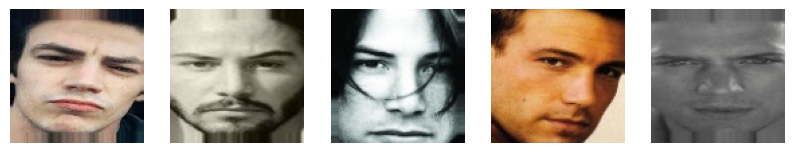

In [ ]:

# Function to plot 5 augmented images from the generator
def plot_augmented_images(generator, num_images=5):
    # Get a batch of images
    data_batch, labels_batch = next(generator)

    # Plot the first 5 images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(data_batch[i])
        plt.axis('off')
    plt.show()

# Show 5 samples of augmented training images
plot_augmented_images(train_generator)


In [ ]:

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height, 3)))  # Flattening the image
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dense(105, activation='softmax'))

from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=201,
#     steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
    epochs=100,  # Adjust based on performance
    callbacks=[early_stopping, reduce_lr]
    ,shuffle=True
)

Epoch 1/100
139/201 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - accuracy: 0.0126 - loss: 4.6477

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


201/201 ━━━━━━━━━━━━━━━━━━━━ 61s 275ms/step - accuracy: 0.0127 - loss: 4.6462 - val_accuracy: 0.0133 - val_loss: 4.6337 - learning_rate: 1.0000e-04
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 269ms/step - accuracy: 0.0149 - loss: 4.6235 - val_accuracy: 0.0122 - val_loss: 4.6021 - learning_rate: 1.0000e-04
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 268ms/step - accuracy: 0.0175 - loss: 4.5815 - val_accuracy: 0.0206 - val_loss: 4.5589 - learning_rate: 1.0000e-04
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 269ms/step - accuracy: 0.0197 - loss: 4.5336 - val_accuracy: 0.0206 - val_loss: 4.5204 - learning_rate: 1.0000e-04
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 269ms/step - accuracy: 0.0198 - loss: 4.5116 - val_accuracy: 0.0188 - val_loss: 4.4864 - learning_rate: 1.0000e-04
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 269ms/step - accuracy: 0.0202 - loss: 4.4615 - val_accuracy: 0.0223 - val_loss: 4.4301 - learning_rate: 1.0000e-04
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 269ms/s

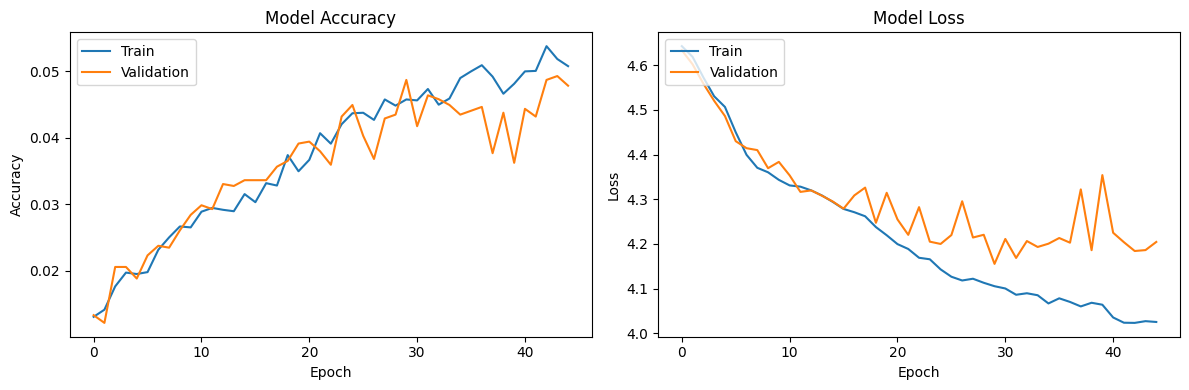

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 317ms/step - accuracy: 0.0383 - loss: 4.1394
Validation Accuracy: 4.09%


In [ ]:

# Assuming 'history' is your training history from model.fit()
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


In [ ]:


# Get predictions on the validation set
y_pred = np.argmax(model.predict(validation_generator), axis=1)
y_true = validation_generator.classes


35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 543ms/step


In [ ]:

print(classification_report(y_true, y_pred, target_names=target_names))


                             precision    recall  f1-score   support

          pins_Adriana Lima       0.00      0.00      0.00        42
          pins_Alex Lawther       0.00      0.00      0.00        30
    pins_Alexandra Daddario       0.00      0.00      0.00        45
          pins_Alvaro Morte       0.00      0.00      0.00        27
           pins_Amanda Crew       0.00      0.00      0.00        23
          pins_Andy Samberg       0.00      0.00      0.00        39
         pins_Anne Hathaway       0.00      0.00      0.00        40
        pins_Anthony Mackie       0.00      0.00      0.00        25
         pins_Avril Lavigne       0.00      0.00      0.00        31
           pins_Ben Affleck       0.00      0.00      0.00        25
            pins_Bill Gates       0.00      0.00      0.00        23
          pins_Bobby Morley       0.00      0.00      0.00        27
      pins_Brenton Thwaites       0.00      0.00      0.00        42
           pins_Brie Larson      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
